# Calculating the Radius from transit depth

You Belong With Me
****

Importing Modules

In [1]:
import astropy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from WhatisLife import Rotator

In [2]:
%matplotlib notebook
π = np.pi
Colour = plt.style.use('tableau-colorblind10')

In [3]:
def ScreamExtractor(File, Sep=','):
    FILENAME = pd.read_csv(f'{File}', sep=Sep, comment='#')
    return FILENAME

In [4]:
Directory = 'C:/Users/georg/Documents/GitHub/Iwan-and-George-Year-4-Project/Exoplanets'
PlanetFile = 'Sorted Data/Planets/HoVan All Planets.csv'
StarFile = 'Sorted Data/Stars/Gaia All Stars.csv'
PlanetData = ScreamExtractor(f'{Directory}/{PlanetFile}')
StarData = ScreamExtractor(f'{Directory}/{StarFile}')
BASTAData = ScreamExtractor(f'{Directory}/Results/JustKenResults.ascii', '\t')
FultonData = ScreamExtractor(f'{Directory}/Sorted Data/Stars/Fulton All Stars.csv')

In [5]:
Object = StarData
for f in range(len(Object)):
    if str(Object['Radius'][f]) == 'nan':
        StarData = StarData.drop(f)
Object = PlanetData
for f in range(len(Object)):
    if str(Object['Host Gaia DR3 ID'][f]) == 'nan':
        PlanetData = PlanetData.drop(f)
Object = BASTAData
for f in range(len(Object)):
    if str(Object['radPhot'][f]) == 'nan':
        BASTAData = BASTAData.drop(f)
Object = FultonData
for f in range(len(Object)):
    if str(Object['Radius'][f]) == 'nan':
        FultonData = FultonData.drop(f)

In [6]:
SourceID = StarData['Gaia DR3 ID'].astype(float)
StellarRadius = StarData['Radius'] #Solar Radius
Temperature = StarData['Teff']
PlanetID = PlanetData['Host Gaia DR3 ID']
OrbitalPeriod = PlanetData['P'] #Days
Ratio = PlanetData['PSR'] #%

In [7]:
OrbitalPeriodList = []
PlanetRadius = []
OrbitalPeriodListBASTA = []
PlanetRadiusBASTA = []
for n in range(len(PlanetID)):
    try:
        Index = StarData.loc[StarData['Gaia DR3 ID'] == PlanetID[n]].index[0]
        OrbitalPeriodList.append(OrbitalPeriod[n])
        Radius = Ratio[n]*StellarRadius[Index]*const.R_sun/const.R_earth
        PlanetRadius.append(Radius)
        
        IndexBASTA = Fulton.loc[FultonData['Gaia DR3 ID'] == PlanetID[n]].index[0]
        OrbitalPeriodListBASTA.append(OrbitalPeriod[n])
        Radius = Ratio[n]*BASTAData['Radius'][IndexBASTA]*const.R_sun/const.R_earth
        PlanetRadiusBASTA.append(Radius)
    except:
        continue

In [8]:
def Gradienter(XAxis, YAxis, m, X=10):
    NewX = np.linspace(10, 10, len(XAxis))
    NewY = 10**(m*(X-XAxis)+YAxis)
    return NewX, NewY

<IPython.core.display.Javascript object>


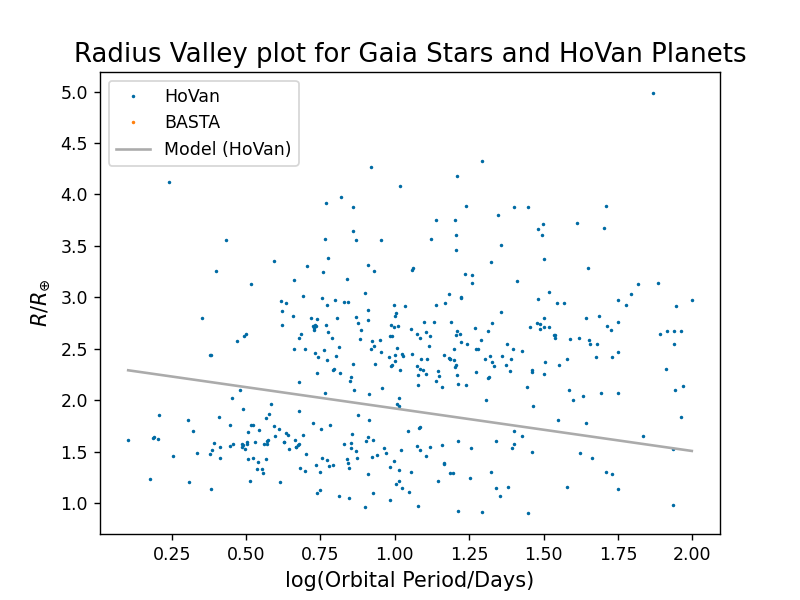

<IPython.core.display.Javascript object>


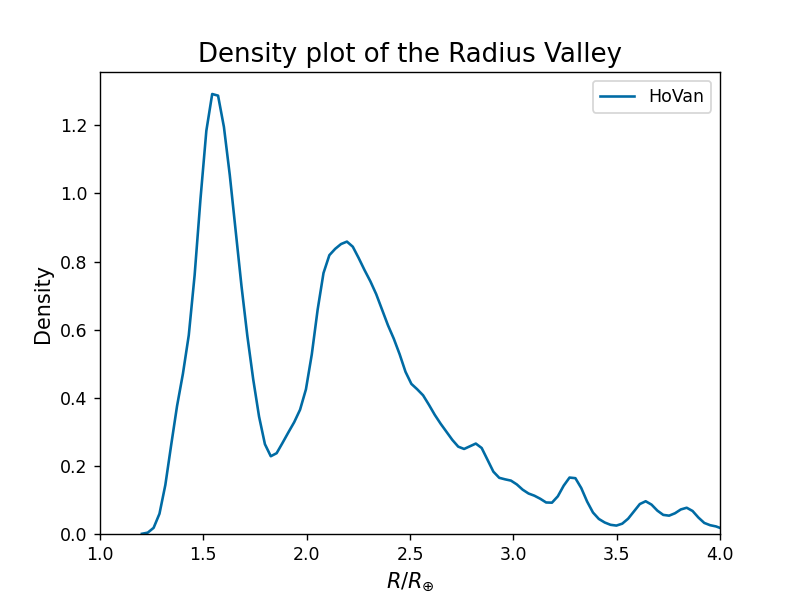

In [9]:
# m = -0.11+-0.02, c = 0.37+0.02-0.03

OP = np.log10(np.array(OrbitalPeriodList))
PR = np.log10(np.array(PlanetRadius))
OPBASTA = np.log10(np.array(OrbitalPeriodListBASTA))
PRBASTA = np.log10(np.array(PlanetRadiusBASTA))
Gradient = np.linspace(-0.096, -0.096, 1)

X, Y = Gradienter(OP, PR, Gradient[0])
XBASTA, YBASTA = Gradienter(OPBASTA, PRBASTA, Gradient[0])

x = np.linspace(min(OP), max(OP), 2)
y = -0.096*x + 0.37

Title = 'Radius Valley plot for Gaia Stars and HoVan Planets'

plt.figure()
plt.plot(OP, 10**PR, '.', color=Colour, markersize=2, label='HoVan')
plt.plot(OPBASTA, 10**PRBASTA, '.', color=Colour, markersize=2, label='BASTA')
plt.plot(x, 10**y, color=Colour, label='Model (HoVan)')
plt.xlabel('log(Orbital Period/Days)', fontsize=12)
plt.ylabel('$R/R_{\oplus}$', fontsize=12)
plt.title(Title, fontsize=15)
plt.legend()
plt.show()
#plt.savefig(f'{Directory}/Plots/Plots I\'m definetly not using for my seminar/{Title}')

Title = 'Density plot of the Radius Valley'
plt.figure()
KDE = sns.kdeplot(10**Y, bw_adjust=0.25, label='HoVan')
plt.xlabel('$R/R_{\oplus}$', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(1, 4)
plt.title(Title, fontsize=15)
plt.legend()
plt.show()
#plt.savefig(f'{Directory}/Plots/Plots I\'m definetly not using for my seminar/{Title}')

In [10]:
x = np.linspace(min(OrbitalPeriodList), max(OrbitalPeriodList), 2)
m = -0.11
c1 = 0.37
y1 = 10**(m*np.log10(x) + c1)

<IPython.core.display.Javascript object>


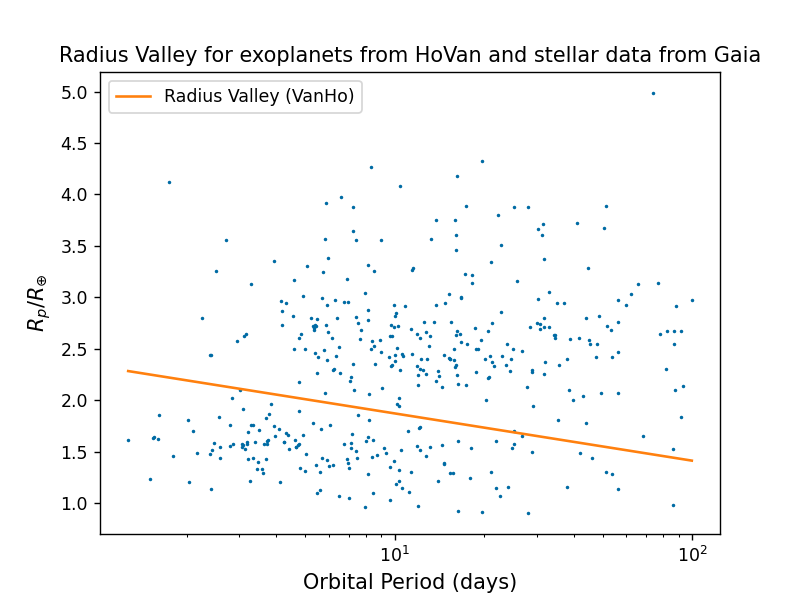

In [11]:
plt.figure()
plt.plot(OrbitalPeriodList, PlanetRadius, '.', markersize=2)
plt.plot(x, y1, label='Radius Valley (VanHo)')
plt.xlabel('Orbital Period (days)', fontsize=12)
plt.ylabel(r'$R_p/R_{\oplus}$', fontsize=12)
plt.title('Radius Valley for exoplanets from HoVan and stellar data from Gaia', fontsize=12)
plt.xscale('log')
plt.legend()
plt.show()

In [12]:
SolarTemp = 5772
Luminosity = StellarRadius**2*(Temperature/SolarTemp)**4
LuminosityBASTA = BASTAData['radPhot']**2*(BASTAData['Teff']/SolarTemp)**4
LuminosityFulton = FultonData['Radius']**2*(FultonData['Teff']/SolarTemp)**4

<IPython.core.display.Javascript object>


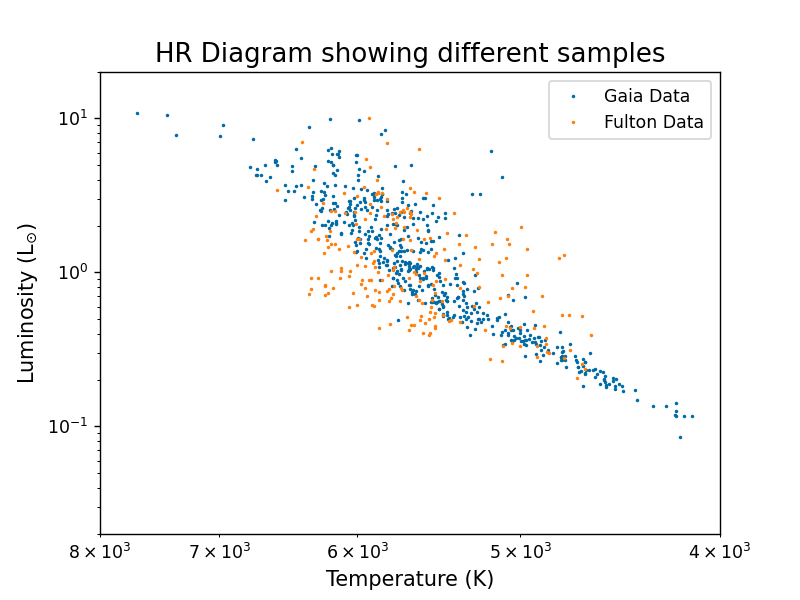

In [13]:
Title = 'HR Diagram showing different samples'

plt.figure()
plt.plot(Temperature, Luminosity, '.', color=Colour, markersize=2, label='Gaia Data')
#plt.plot(BASTAData['Teff'], LuminosityBASTA, '.', color=Colour, markersize=2, label='BASTA (Gaia) Data')
plt.plot(FultonData['Teff'], LuminosityFulton, '.', color=Colour, markersize=2, label='Fulton Data')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Luminosity (L$_{\odot}$)', fontsize=12)
plt.title(Title, fontsize=15)
plt.xlim(8000, 4000)
plt.ylim(0.02, 20)
plt.legend()
plt.show()
#plt.savefig(f'{Directory}/Plots/Plots I\'m definetly not using for my seminar/{Title}')

You tatty git